## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 3.เขียนโปรแกรมสำหรับสร้างตัวจำแนกกำลังสอง
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจง
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

In [253]:
import numpy as np
import matplotlib.pyplot as plt

In [254]:
# Define the Gaussian probability density function (PDF)
def Probability_density(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))

In [255]:
# QDA parameters for the set data
mean_class_1 = np.array([2, 0])
cov_class_1 = np.array([[0.5, 0], [0, 0.25]])
mean_class_2 = np.array([1, 0])
cov_class_2 = np.array([[0.25, 0], [0, 0.5]])
inv_cov_class_1 = np.linalg.inv(cov_class_1)
inv_cov_class_2 = np.linalg.inv(cov_class_2)
prior_class_1 = 0.5
prior_class_2 = 0.5

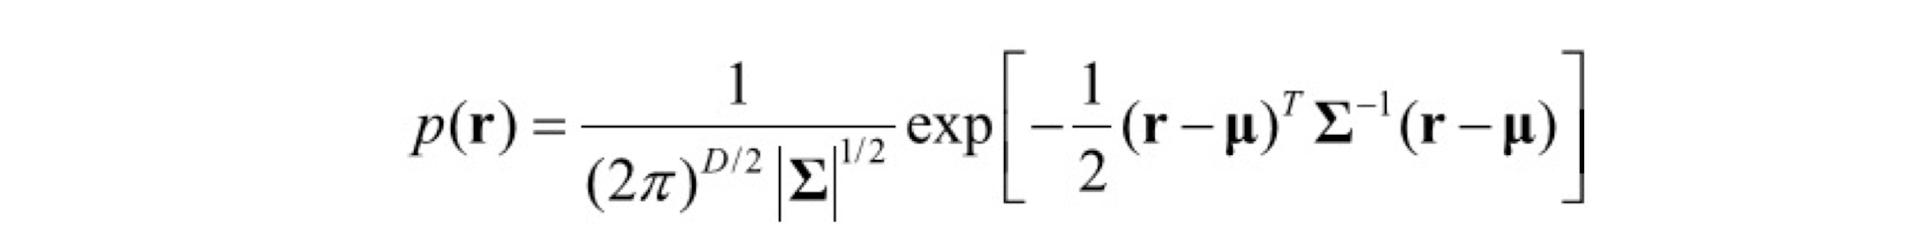

In [256]:
# ตัวจำแนกกำลังสอง (Quadratic Discriminant)
def qda_discriminant(x, mean, inv_cov, prior):
    diff = x - mean  # r−μ
    return -0.5 * np.dot(np.dot(diff.T, inv_cov), diff) + np.log(prior) 
    # >>> (r−μ)^T  Σ ^−1(r−μ)

# ฟังก์ชันคำนวณ priors จากข้อมูลตัวอย่าง
def calculate_priors(class1, class2):
    total_samples = len(class1) + len(class2)
    prior1 = len(class1) / total_samples
    prior2 = len(class2) / total_samples
    return prior1, prior2

In [257]:
# Generate grid for plotting decision boundaries
x1_range = np.linspace(-4, 4, 100)
x2_range = np.linspace(-4, 4, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Compute QDA scores on the grid
g1_values = np.zeros_like(x1_grid)
g2_values = np.zeros_like(x1_grid)

for i in range(x1_grid.shape[0]):
    for j in range(x1_grid.shape[1]):
        x = np.array([x1_grid[i, j], x2_grid[i, j]])
        g1_values[i, j] = qda_discriminant(x, mean_class_1, inv_cov_class_1, prior_class_1)
        g2_values[i, j] = qda_discriminant(x, mean_class_2, inv_cov_class_2, prior_class_2)

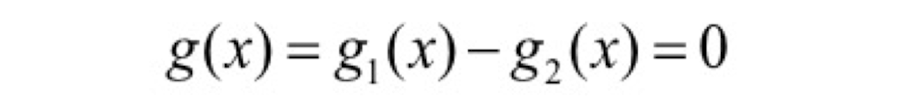

In [258]:
# Decision boundary: g1 = g2
decision_boundary = np.abs(g1_values - g2_values).argmin()

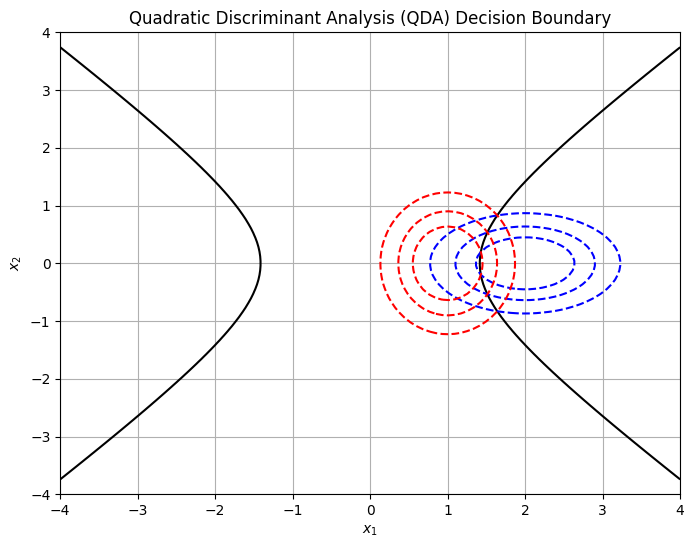

In [259]:
from scipy.stats import multivariate_normal

# Plotting the QDA decision boundary
plt.figure(figsize=(8, 6))
plt.contour(x1_grid, x2_grid, g1_values - g2_values, levels=[0], colors='black')
plt.title("Quadratic Discriminant Analysis (QDA) Decision Boundary")

# Gaussian contours
rv_class_1 = multivariate_normal(mean_class_1, cov_class_1)
rv_class_2 = multivariate_normal(mean_class_2, cov_class_2)
x, y = np.meshgrid(x1_range, x2_range)
pos = np.dstack((x, y))
plt.contour(x, y, rv_class_1.pdf(pos), levels=[0.1, 0.2, 0.3], colors='blue', linestyles='dashed')
plt.contour(x, y, rv_class_2.pdf(pos), levels=[0.1, 0.2, 0.3], colors='red', linestyles='dashed')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.show()

In [260]:
# Set seed for reproducibility
np.random.seed(42)

# Generate samples from normal distributions for both classes
samples_class_1 = np.random.multivariate_normal(mean_class_1, cov_class_1, 500)
samples_class_2 = np.random.multivariate_normal(mean_class_2, cov_class_2, 500)

# make prior
prior_class_1_sp,prior_class_2_sp = calculate_priors(samples_class_1, samples_class_2)


# Compute mean and covariance from the sampled data
mean_class_1_sample = np.mean(samples_class_1, axis=0)
mean_class_2_sample = np.mean(samples_class_2, axis=0)
cov_class_1_sample = np.cov(samples_class_1, rowvar=False)
cov_class_2_sample = np.cov(samples_class_2, rowvar=False)
inv_cov_class_1_sample = np.linalg.inv(cov_class_1_sample)
inv_cov_class_2_sample = np.linalg.inv(cov_class_2_sample)

# Compute QDA scores for the sampled data
g1_values_sample = np.zeros_like(x1_grid)
g2_values_sample = np.zeros_like(x1_grid)

for i in range(x1_grid.shape[0]):
    for j in range(x1_grid.shape[1]):
        x = np.array([x1_grid[i, j], x2_grid[i, j]])
        g1_values_sample[i, j] = qda_discriminant(x, mean_class_1_sample, inv_cov_class_1_sample, prior_class_1_sp)
        g2_values_sample[i, j] = qda_discriminant(x, mean_class_2_sample, inv_cov_class_2_sample, prior_class_2_sp)

# Decision boundary for sampled data: g1 = g2
decision_boundary_sample = np.abs(g1_values_sample - g2_values_sample).argmin()


samples_class_1

array([[ 2.35122995, -0.06913215],
       [ 2.45798496,  0.76151493],
       [ 1.83442856, -0.11706848],
       [ 3.11667209,  0.38371736],
       [ 1.66803148,  0.27128002],
       [ 1.67231421, -0.23286488],
       [ 2.17109316, -0.95664012],
       [ 0.7802989 , -0.28114376],
       [ 1.28382025,  0.15712367],
       [ 1.35793002, -0.70615185],
       [ 3.03637018, -0.11288815],
       [ 2.04774965, -0.71237409],
       [ 1.61506328,  0.05546129],
       [ 1.18612464,  0.18784901],
       [ 1.57528431, -0.14584687],
       [ 1.57452917,  0.92613909],
       [ 1.99045602, -0.52885546],
       [ 2.58162709, -0.61042182],
       [ 2.14768886, -0.97983506],
       [ 1.06083064,  0.09843062],
       [ 2.52217473,  0.08568414],
       [ 1.91822432, -0.15055185],
       [ 0.95452707, -0.3599221 ],
       [ 1.6742792 ,  0.52856111],
       [ 2.24297482, -0.88152008],
       [ 2.22916197, -0.19254114],
       [ 1.52134386,  0.30583814],
       [ 2.72902675,  0.46564006],
       [ 1.4065836 ,

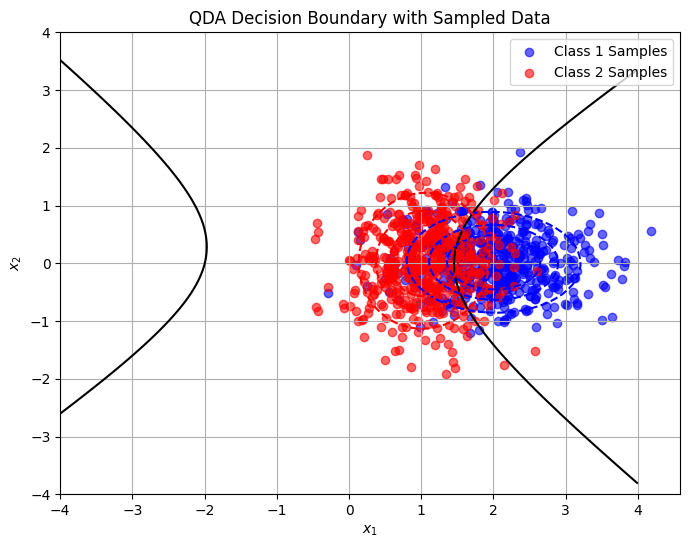

In [261]:
# Plot QDA decision boundary for sampled data
plt.figure(figsize=(8, 6))
plt.contour(x1_grid, x2_grid, g1_values_sample - g2_values_sample, levels=[0], colors='black')
plt.title("QDA Decision Boundary with Sampled Data")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)

# Plot sample points from Class 1 in blue
plt.scatter(samples_class_1[:, 0], samples_class_1[:, 1], color='blue', label='Class 1 Samples', alpha=0.6)
# Plot sample points from Class 2 in red
plt.scatter(samples_class_2[:, 0], samples_class_2[:, 1], color='red', label='Class 2 Samples', alpha=0.6)

# Gaussian contours for sampled data
rv_class_1_sp = multivariate_normal(mean_class_1_sample, cov_class_1_sample)
rv_class_2_sp = multivariate_normal(mean_class_2_sample, cov_class_2_sample)
plt.contour(x1_grid, x2_grid, rv_class_1_sp.pdf(pos), levels=[0.1, 0.2, 0.3], colors='blue', linestyles='dashed')
plt.contour(x1_grid, x2_grid, rv_class_2_sp.pdf(pos), levels=[0.1, 0.2, 0.3], colors='red', linestyles='dashed')

plt.legend()
plt.show()

#### For Likelihoods and Posteriors

In [262]:
# Generate X values for plotting
x_values = np.linspace(-5, 10, 500)

# Compute likelihoods for the set data
likelihood_class_1 = Probability_density(x_values, mean_class_1[0], cov_class_1[0, 0])
likelihood_class_2 = Probability_density(x_values, mean_class_2[0], cov_class_2[0, 0])

# Compute posteriors for the set data
posterior_class_1 = (likelihood_class_1 * prior_class_1) / (likelihood_class_1 * prior_class_1 + likelihood_class_2 * prior_class_2)
posterior_class_2 = (likelihood_class_2 * prior_class_2) / (likelihood_class_1 * prior_class_1 + likelihood_class_2 * prior_class_2)

# Compute decision boundary for set data
decision_boundary_set = (mean_class_1[0] + mean_class_2[0]) / 2  # You can replace this with a more advanced calculation if needed

# Compute likelihoods for the sampled data
likelihood_class_1_sample = Probability_density(x_values, mean_class_1_sample[0], cov_class_1_sample[0, 0])
likelihood_class_2_sample = Probability_density(x_values, mean_class_2_sample[0], cov_class_2_sample[0, 0])

# Compute posteriors for the sampled data
posterior_class_1_sample = (likelihood_class_1_sample * prior_class_1_sp) / (likelihood_class_1_sample * prior_class_1_sp + likelihood_class_2_sample * prior_class_2_sp)
posterior_class_2_sample = (likelihood_class_2_sample * prior_class_2_sp) / (likelihood_class_1_sample * prior_class_1_sp + likelihood_class_2_sample * prior_class_2_sp)

# Compute decision boundary for sampled data
decision_boundary_sample = (mean_class_1_sample[0] + mean_class_2_sample[0]) / 2  # You can replace this with a more advanced calculation if needed


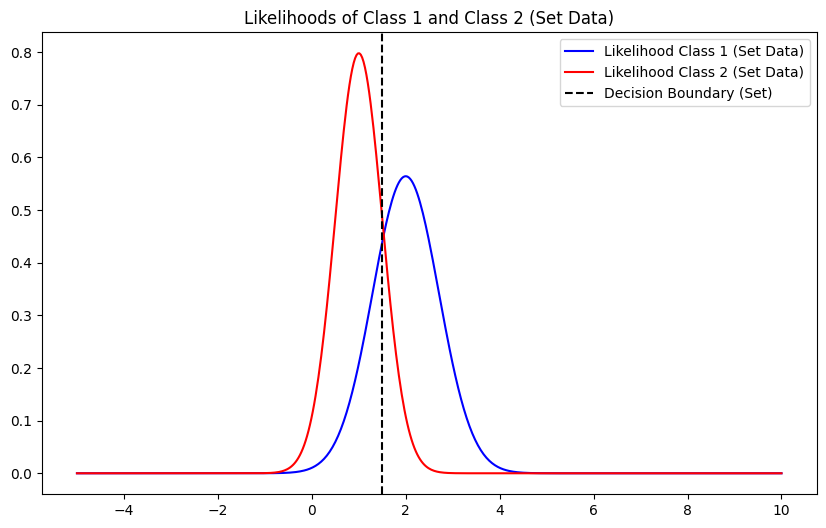

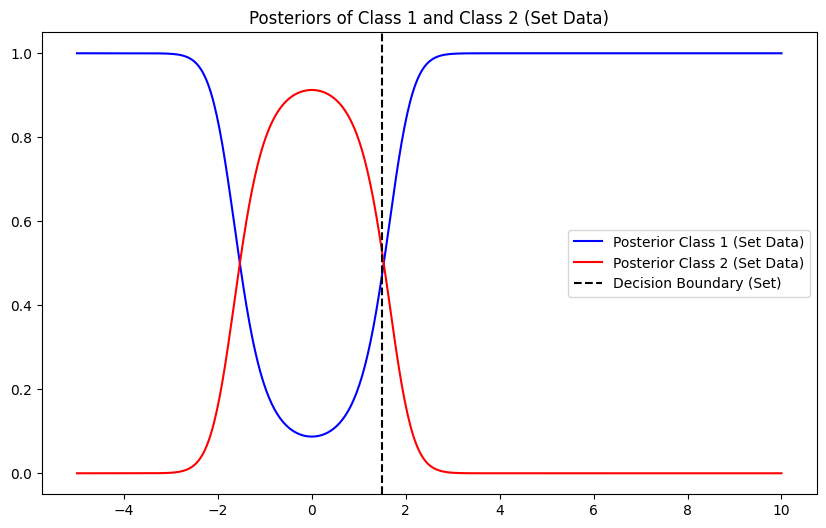

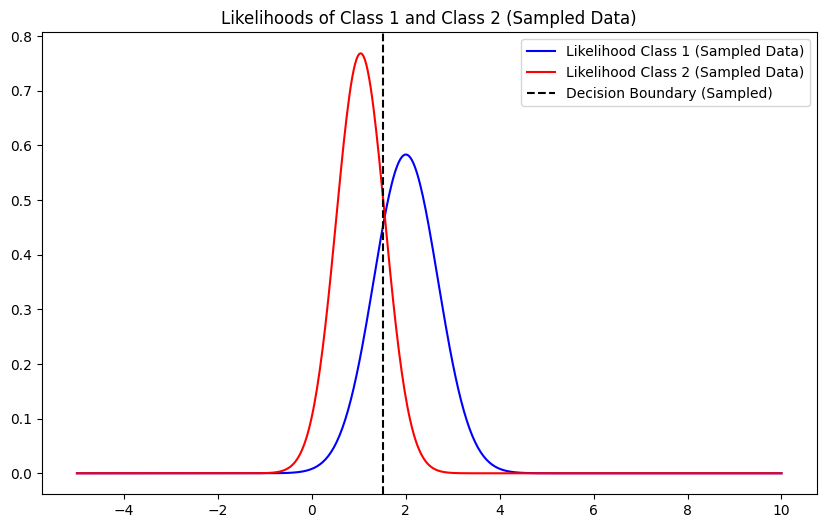

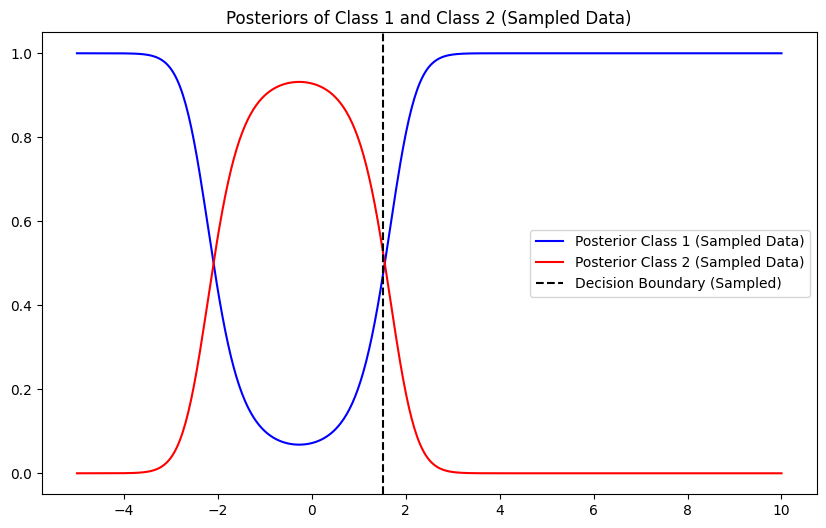

In [263]:

# Plot Likelihoods for set data with Decision Boundary
plt.figure(figsize=(10, 6))
plt.plot(x_values, likelihood_class_1, label='Likelihood Class 1 (Set Data)', color='blue')
plt.plot(x_values, likelihood_class_2, label='Likelihood Class 2 (Set Data)', color='red')
plt.axvline(x=decision_boundary_set, color='k', linestyle='--', label='Decision Boundary (Set)')
plt.title('Likelihoods of Class 1 and Class 2 (Set Data)')
plt.legend()
plt.show()

# Plot Posteriors for set data with Decision Boundary
plt.figure(figsize=(10, 6))
plt.plot(x_values, posterior_class_1, label='Posterior Class 1 (Set Data)', color='blue')
plt.plot(x_values, posterior_class_2, label='Posterior Class 2 (Set Data)', color='red')
plt.axvline(x=decision_boundary_set, color='k', linestyle='--', label='Decision Boundary (Set)')
plt.title('Posteriors of Class 1 and Class 2 (Set Data)')
plt.legend()
plt.show()

# Plot Likelihoods for sampled data with Decision Boundary
plt.figure(figsize=(10, 6))
plt.plot(x_values, likelihood_class_1_sample, label='Likelihood Class 1 (Sampled Data)', color='blue')
plt.plot(x_values, likelihood_class_2_sample, label='Likelihood Class 2 (Sampled Data)', color='red')
plt.axvline(x=decision_boundary_sample, color='k', linestyle='--', label='Decision Boundary (Sampled)')
plt.title('Likelihoods of Class 1 and Class 2 (Sampled Data)')
plt.legend()
plt.show()

# Plot Posteriors for sampled data with Decision Boundary
plt.figure(figsize=(10, 6))
plt.plot(x_values, posterior_class_1_sample, label='Posterior Class 1 (Sampled Data)', color='blue')
plt.plot(x_values, posterior_class_2_sample, label='Posterior Class 2 (Sampled Data)', color='red')
plt.axvline(x=decision_boundary_sample, color='k', linestyle='--', label='Decision Boundary (Sampled)')
plt.title('Posteriors of Class 1 and Class 2 (Sampled Data)')
plt.legend()
plt.show()


- add contour ให้เห็นผลชัดขึ้น